In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# from keras.models import Model
# from keras.layers import Input, Dense

# import tensorflow.python.util.deprecation as deprecation
# deprecation._PRINT_DEPRECATION_WARNINGS = False


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [2]:
with open('data_batch_1', 'rb') as f:
    dat = pickle.load(f, encoding='bytes')

In [3]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(dat[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

In [4]:
images = images.mean(axis=-1)
images = images / 255.0
images = images.reshape((-1, 32 ** 2))
images

array([[0.24052288, 0.1751634 , 0.18431373, ..., 0.70588235, 0.46143791,
        0.3751634 ],
       [0.67712418, 0.52156863, 0.39738562, ..., 0.54248366, 0.54771242,
        0.54901961],
       [1.        , 0.99215686, 0.99215686, ..., 0.32156863, 0.32287582,
        0.32679739],
       ...,
       [0.25098039, 0.21437908, 0.27843137, ..., 0.28888889, 0.29673203,
        0.29934641],
       [0.99346405, 0.99477124, 0.85620915, ..., 0.8379085 , 1.        ,
        0.99738562],
       [0.1620915 , 0.16078431, 0.15816993, ..., 0.64705882, 0.64705882,
        0.64836601]])

In [5]:
input_layer = Input(shape=(1024,))

In [6]:
hidden_encoding = Dense(512, activation='relu')(input_layer)

In [7]:
encoding_stage = Dense(256, activation='relu')(hidden_encoding)

In [8]:
hidden_decoding = Dense(512, activation='relu')(encoding_stage)

In [9]:
decoding_stage = Dense(1024, activation='sigmoid')(hidden_decoding)

In [10]:
autoencoder = Model(input_layer, decoding_stage)

In [11]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [12]:
autoencoder.fit(images, images, epochs=100)

Train on 10000 samples
Epoch 1/2
10000/10000 [==============================] - 23s 2ms/sample - loss: 0.6968
Epoch 2/2
10000/10000 [==============================] - 7s 744us/sample - loss: 0.6966


In [13]:
encoder_output = Model(input_layer, encoding_stage).predict(images[:5])

In [14]:
encoder_output = encoder_output.reshape((-1, 16, 16)) * 255

In [15]:
decoder_output = autoencoder.predict(images[:5])

In [16]:
decoder_output = decoder_output.reshape((-1, 32,32)) * 255

In [17]:
images = images.reshape((-1, 32, 32))

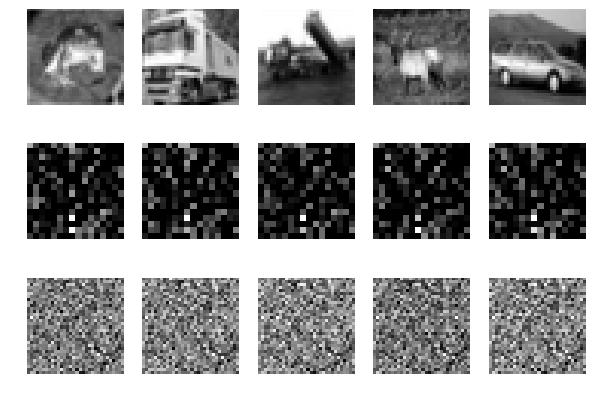

In [18]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot the original image
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    # Plot the encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    # Plot the decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        

In [19]:
# Unit test

In [20]:
import unittest
class TestEncodeDense(unittest.TestCase):   
    
    def test_dat(self):
        self.assertEqual(len(dat),4)
        
    def test_images(self):
        self.assertEqual(len(images),10000)
        
    def test_input_layer_shape(self):
        self.assertListEqual(list(input_layer.shape),[None, 1024])
        
    def test_hidden_encoding_shape(self):
        self.assertListEqual(list(hidden_encoding.shape),[None, 512])
        
    def test_encoding_stage(self):
        self.assertListEqual(list(encoding_stage.shape),[None, 256])
        
    def test_hidden_decoding_shape(self):
        self.assertListEqual(list(hidden_decoding.shape),[None,512])
        
    def test_decoding_stage(self):
        self.assertListEqual(list(decoding_stage.shape),[None, 1024])
        
         

In [21]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestEncodeDense)
unittest.TextTestRunner(verbosity=2).run(suite)

test_dat (__main__.TestEncodeDense) ... ok
test_decoding_stage (__main__.TestEncodeDense) ... ok
test_encoding_stage (__main__.TestEncodeDense) ... ok
test_hidden_decoding_shape (__main__.TestEncodeDense) ... ok
test_hidden_encoding_shape (__main__.TestEncodeDense) ... ok
test_images (__main__.TestEncodeDense) ... ok
test_input_layer_shape (__main__.TestEncodeDense) ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.017s

OK


<unittest.runner.TextTestResult run=7 errors=0 failures=0>